# <a id='toc1_'></a>[Attribute Visualization](#toc0_)
This notebook demonstrates the use of `ColumnVisualizer` class in `src/visualization/columns.py` for visualizing the attributes present in raw data.

**Table of contents**<a id='toc0_'></a>    
- [Attribute Visualization](#toc1_)    
  - [Setup](#toc1_1_)    
  - [Data Digestion and Preprocessing](#toc1_2_)    
  - [Visualization](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Setup](#toc0_)

In [ ]:
import sys
from pathlib import Path

Jupyter server should be run at the notebook directory, so the output of the following cell would be the project root:

In [ ]:
project_root = Path.cwd().resolve().parent.parent
print(f"Project root: {project_root.name}")

Project root: ds4cg-job-analytics


In [ ]:
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [ ]:
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.visualization.columns, src.database.database_connection, \
    src.visualization.models, src.preprocess.preprocess

In [ ]:
from src.visualization import ColumnVisualizer
from src.preprocess import Preprocess
from src.database import DatabaseConnection

## <a id='toc1_2_'></a>[Data Digestion and Preprocessing](#toc0_)

In [ ]:
db_path = Path(project_root) / "data/slurm_data.db"
db_connection = DatabaseConnection(str(db_path.resolve()), anonymize=True)

jobs_df = db_connection.fetch_all_jobs()

Connected to slurm_data.db


In [ ]:
clean_jobs_df = Preprocess().preprocess_data(jobs_df, min_elapsed_seconds=600, anonymize=True)
display(clean_jobs_df)
print(clean_jobs_df.shape)

[Preprocessing] Running with new database format: GPU types as dictionary.


  clean_jobs_df = Preprocess().preprocess_data(jobs_df, min_elapsed_seconds=600, anonymize=True)


Found 42 records with errors. Reporting them to a summary file preprocessing_errors.log.
Processing error log file already exists. Overwriting preprocessing_errors.log


,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,...,GPUType,GPUMemUsage,GPUComputeUsage,CPUMemUsage,CPUComputeUsage,Queued,vram_constraint,partition_constraint,requested_vram,allocated_vram
11726246,41012953,<NA>,-1,job.sh,False,non-interactive,account_98,user_732,['2080ti'],normal,...,{'2080_ti': 1},0.000000e+00,0.0,1.766359e+08,99.950012,0 days 00:35:47,11,<NA>,11,11
11726245,41012951,<NA>,-1,job.sh,False,non-interactive,account_98,user_732,['2080ti'],normal,...,{'2080_ti': 1},0.000000e+00,0.0,1.723802e+08,99.964767,0 days 00:36:02,11,<NA>,11,11
11726244,41012949,<NA>,-1,job.sh,False,non-interactive,account_98,user_732,['2080ti'],normal,...,{'2080_ti': 1},0.000000e+00,0.0,1.716470e+08,99.970505,0 days 00:37:20,11,<NA>,11,11
11726241,41012881,<NA>,-1,job.sh,False,non-interactive,account_98,user_732,['2080ti'],normal,...,{'2080_ti': 1},0.000000e+00,0.0,1.711022e+08,99.945618,0 days 00:36:56,11,<NA>,11,11
11726240,41012877,<NA>,-1,job.sh,False,non-interactive,account_98,user_732,['2080ti'],normal,...,{'2080_ti': 1},0.000000e+00,0.0,1.712169e+08,99.963730,0 days 00:36:48,11,<NA>,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10819458,23946071,<NA>,-1,sbatch,False,non-interactive,account_21,user_901,['vram40'],normal,...,{'rtx_8000': 1},1.913022e+10,82.0,1.739481e+10,49.981564,0 days 00:02:10,40,<NA>,40,48
10841215,23946070,<NA>,-1,sbatch,False,non-interactive,account_21,user_901,['vram40'],normal,...,{'rtx_8000': 1},1.913022e+10,82.0,1.402193e+10,49.977093,0 days 00:00:07,40,<NA>,40,48
10841214,23946069,<NA>,-1,sbatch,False,non-interactive,account_21,user_901,['vram40'],normal,...,{'rtx_8000': 1},1.915119e+10,81.0,1.742611e+10,49.961525,0 days 00:00:10,40,<NA>,40,48
10891189,23890375,<NA>,-1,sys/dashboard/sys/bc_vscode,False,bc_vscode,account_56,user_989,['x86_64'],normal,...,{'a100': 1},0.000000e+00,0.0,5.203149e+07,0.000062,11 days 07:06:20,<NA>,<NA>,<NA>,80


(660508, 31)


## <a id='toc1_3_'></a>[Visualization](#toc0_)

In [ ]:
visualizer = ColumnVisualizer(clean_jobs_df)

Summary file already exists. Overwriting columns_stats_summary.txt
Skipping visualization for column type 'ArrayJobID' in DataFrame.
Skipping visualization for column type 'JobName' in DataFrame.


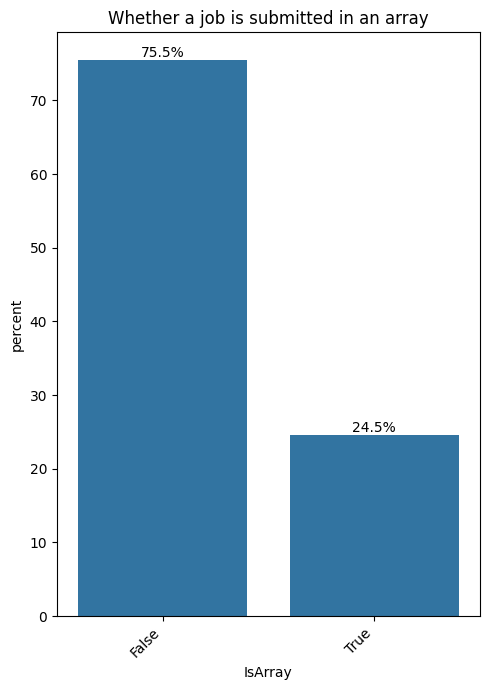

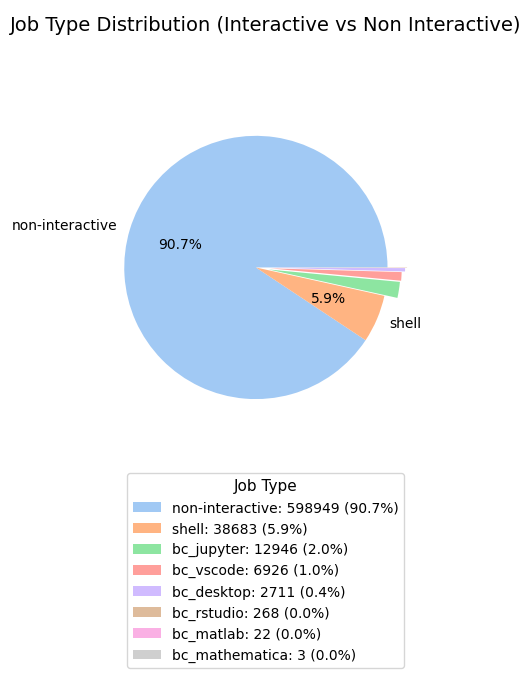

Skipping visualization for column type 'Account' in DataFrame.
Skipping visualization for column type 'User' in DataFrame.


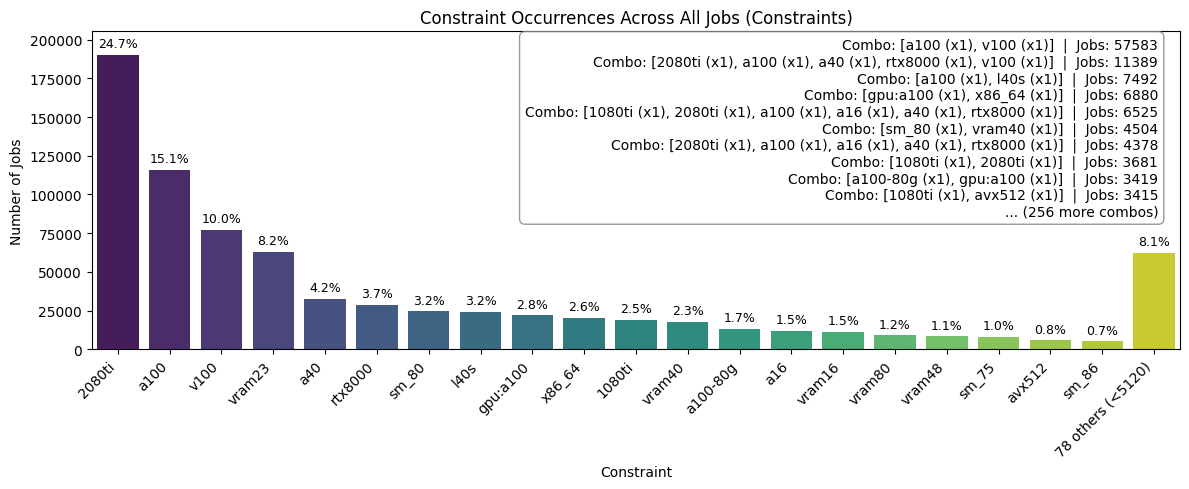

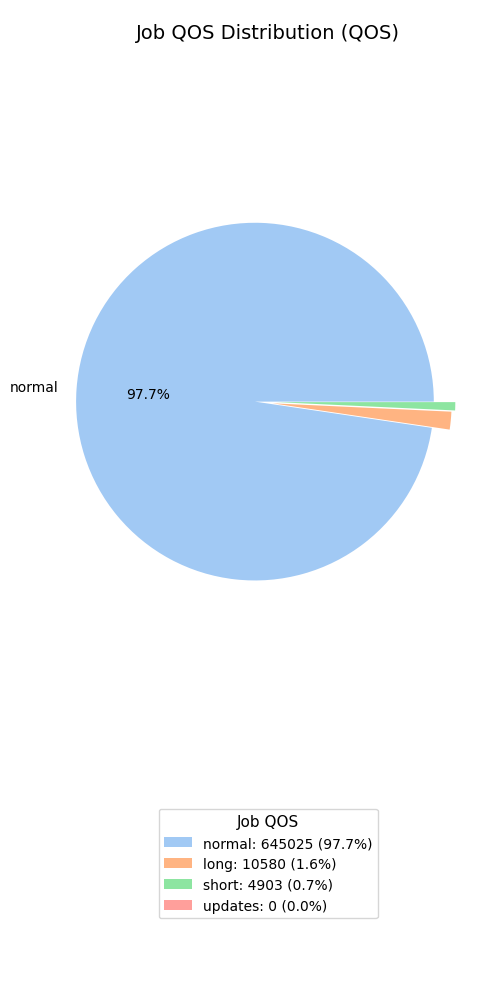

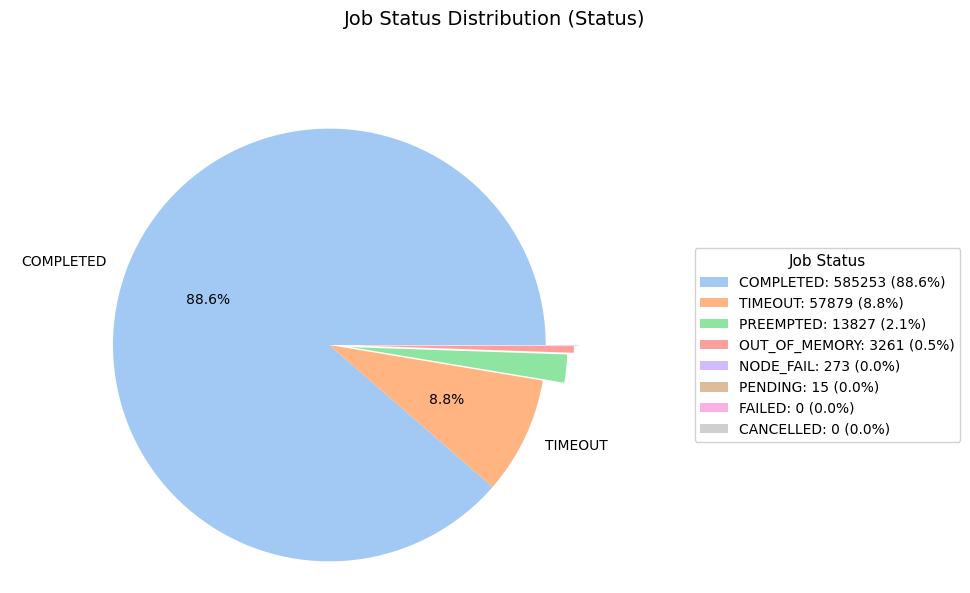

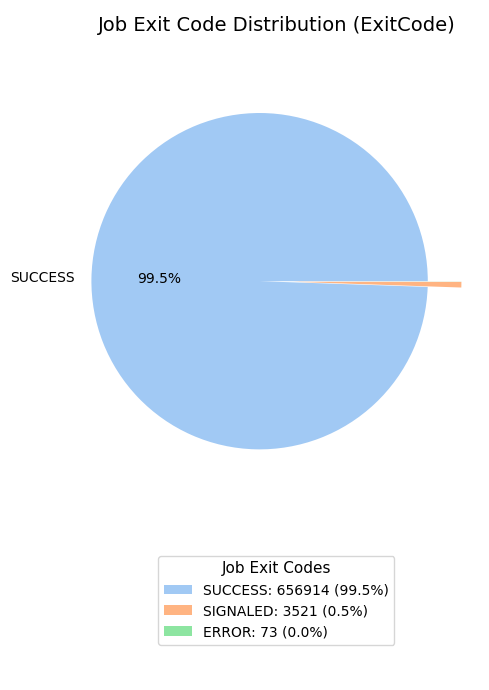

Skipping visualization for column type 'SubmitTime' in DataFrame.


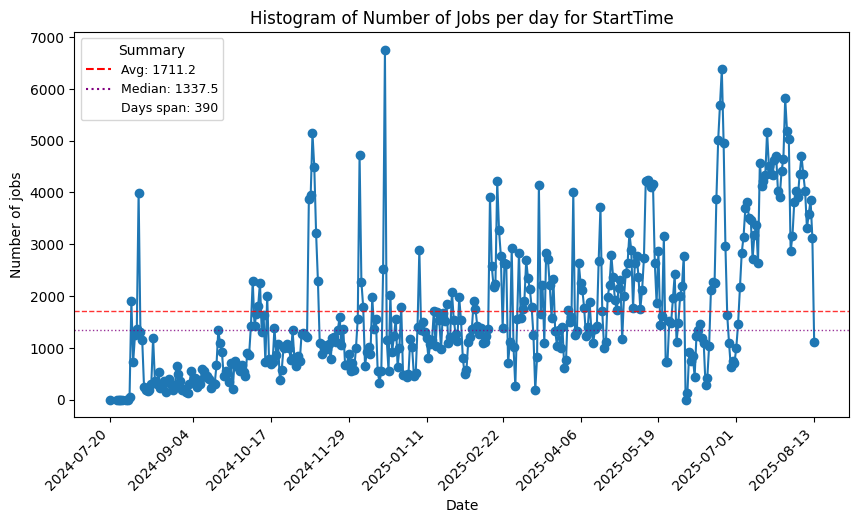

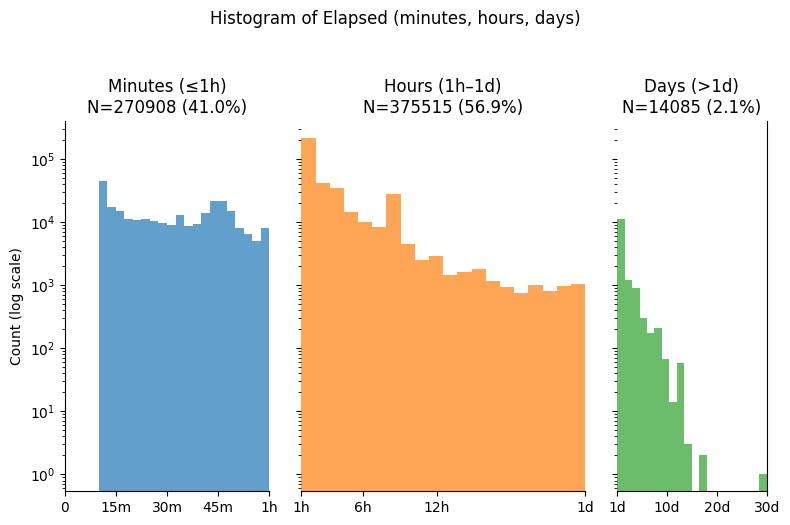

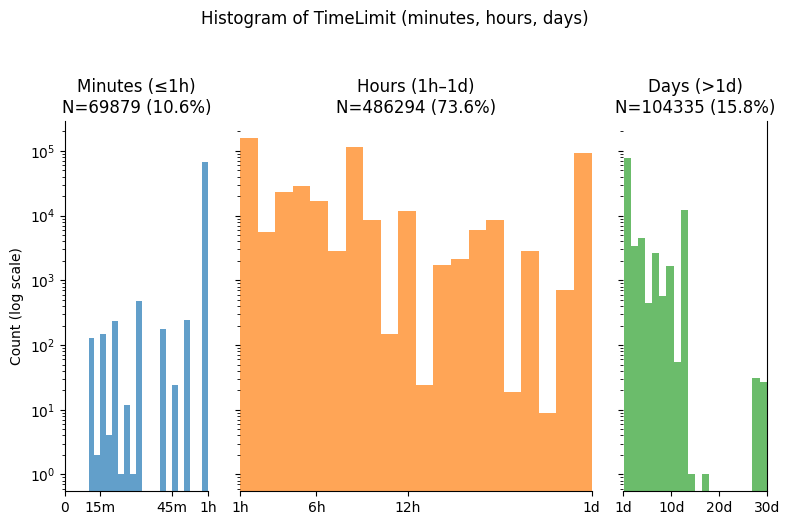

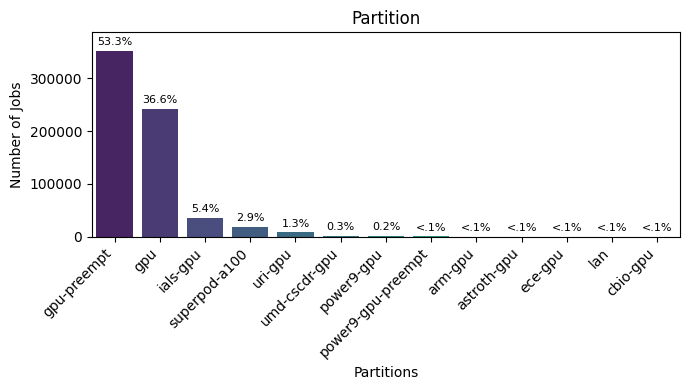

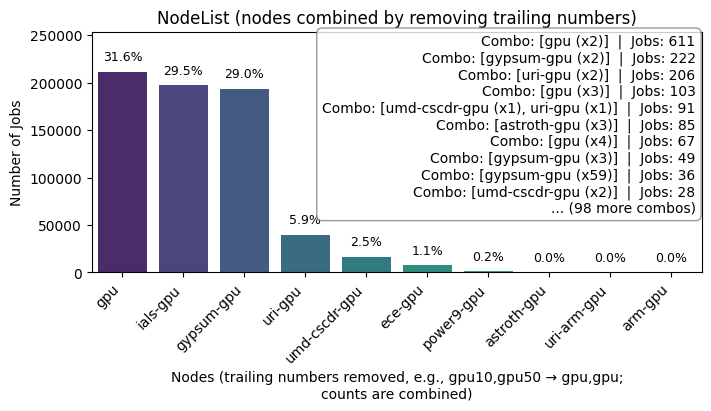

Skipping visualization for column type 'CPUs' in DataFrame.


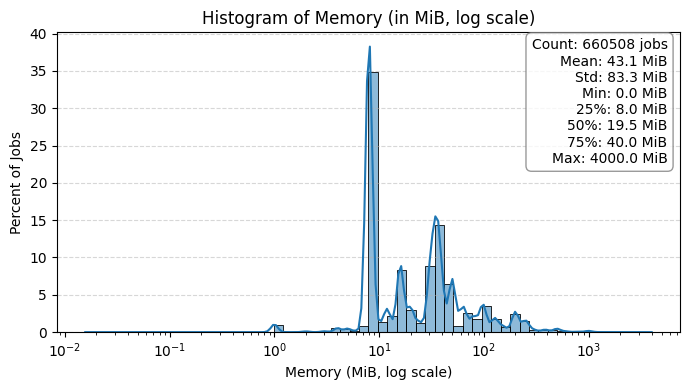

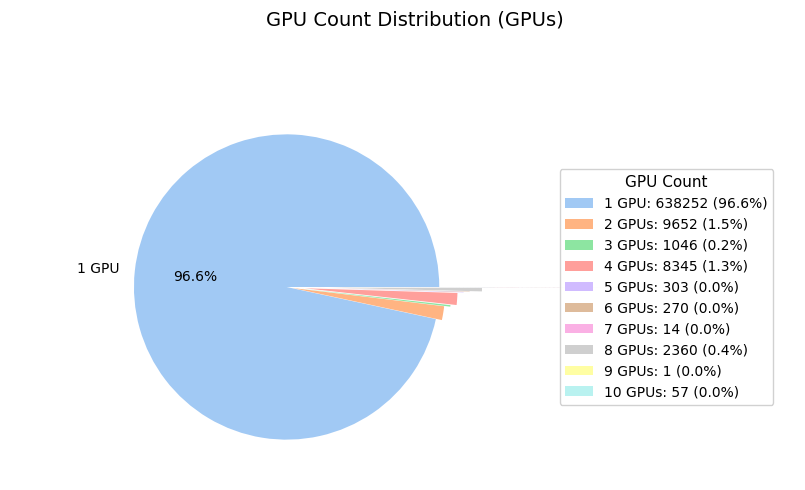

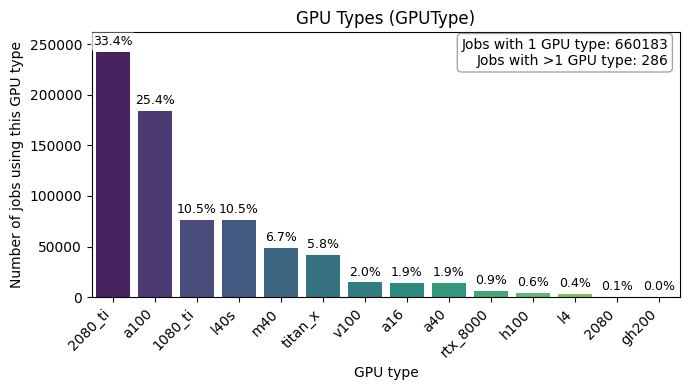

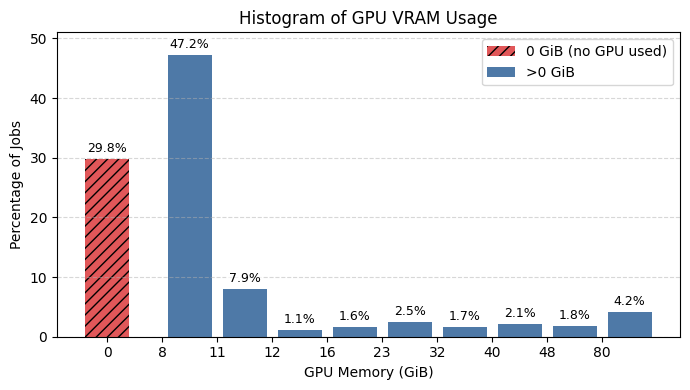

Skipping visualization for column type 'GPUComputeUsage' in DataFrame.


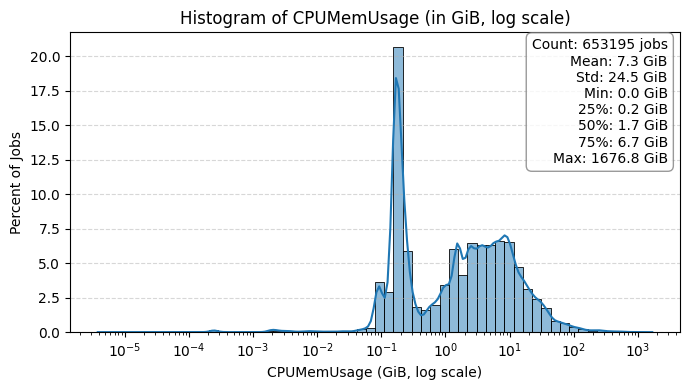

Skipping visualization for column type 'CPUComputeUsage' in DataFrame.
Skipping visualization for column type 'Queued' in DataFrame.
Skipping visualization for column type 'vram_constraint' in DataFrame.
Skipping visualization for column type 'partition_constraint' in DataFrame.
Skipping visualization for column type 'requested_vram' in DataFrame.
Skipping visualization for column type 'allocated_vram' in DataFrame.


In [ ]:
visualizer.visualize(
    output_dir_path=Path(Path(project_root) / "data/visualizations"),
    columns=None,
)